## 1. Detection task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def get_standard_deviation(mu, alpha, beta):
    
    sd=np.sqrt((1+mu**alpha)**beta)
    
    return sd

In [3]:
def get_gaussuan(stimulus_intensity, mu, sd):
    
    model_prob = norm.cdf(stimulus_intensity, mu, sd)
    
    return model_prob

In [51]:
def detection(n_trial, stimulus_intensity, zero, non_zero):
    
    resp_arr = [[] for stim in stimulus_intensity]
    cnt = 0
    
#   mean이 mu일 때의 모든 샘플과 mean이 0일때의 각 샘플 비교
    for i in range(len(stimulus_intensity)):
        cur_non_zero_pr = non_zero[i]
        
        for _ in range(n_trial):
            cur_zero_pr = zero[cnt]
#             print(cur_non_zero_pr, cur_zero_pr)

            if cur_zero_pr <= cur_non_zero_pr:
                resp_arr[i].append(1)
            else:
                resp_arr[i].append(0)
            
            cnt+=1
            
    return resp_arr

In [5]:
def analysis(detect_resp_arr):
    
    correct_pr=[]
    for i in range(len(detect_resp_arr)):
        num_correct = np.sum(detect_resp_arr[i])
        num_trial = len(detect_resp_arr[i])
        correct_pr.append(num_correct / num_trial)
        
    return correct_pr 

In [6]:
mus = np.arange(10, 91, 10)
alphas = np.arange(0, 3.5, 0.5)
betas = np.arange(0, 3.5, 0.5)

In [67]:
stim_x = np.linspace(0,100,10)

In [66]:
stim_x

array([ 10.        ,  21.11111111,  32.22222222,  43.33333333,
        54.44444444,  65.55555556,  76.66666667,  87.77777778,
        98.88888889, 110.        ])

In [46]:
# zero_prob = get_gaussuan(stim_x, 0, get_standard_deviation(0, alphas[0], betas[0]))
zero_prob = np.random.normal(0, get_standard_deviation(0, alphas[0], betas[0]), 10000)

In [47]:
zero_prob

array([0.31667258, 1.82850585, 1.40879393, ..., 1.55871705, 0.67111581,
       0.50891197])

In [10]:
model_prob = get_gaussuan(stim_x, mus[0], get_standard_deviation(mus[0], alphas[0], betas[0]))

In [48]:
model_prob

array([7.61985302e-24, 8.41344746e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00])

In [71]:
n_trial = 100

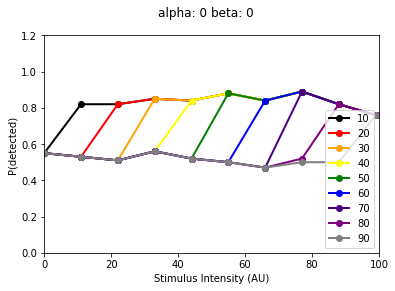

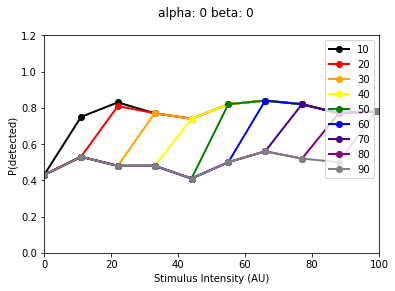

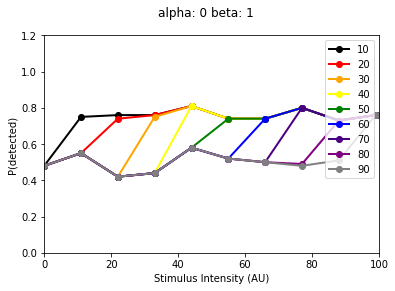

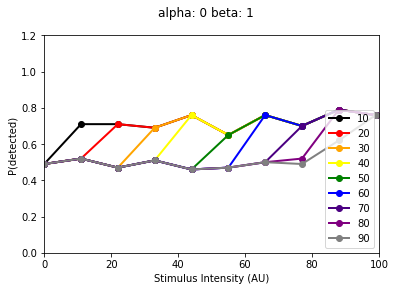

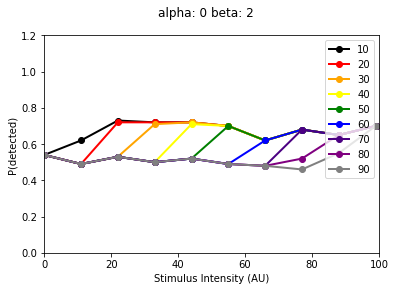

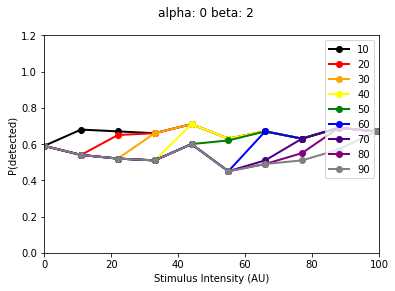

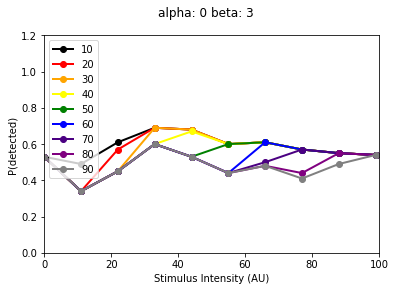

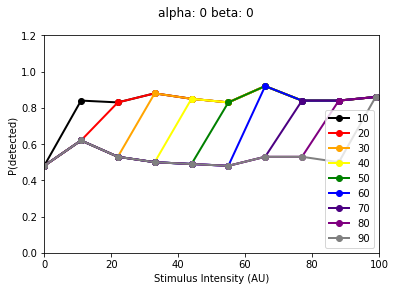

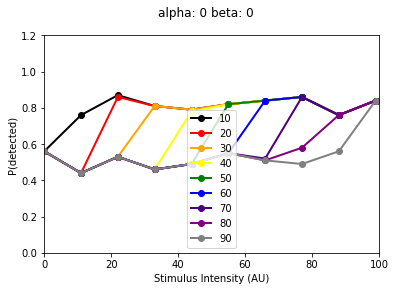

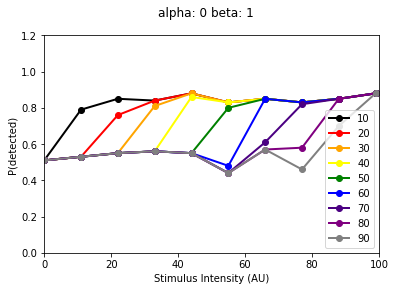

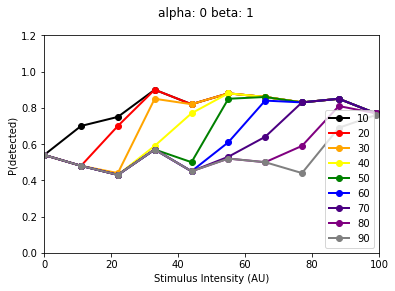

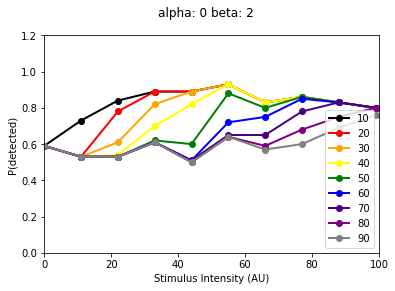

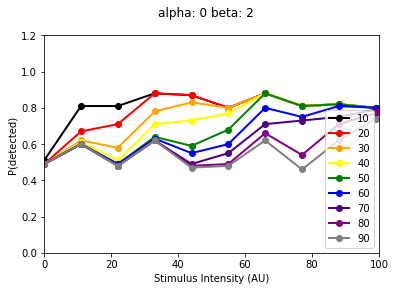

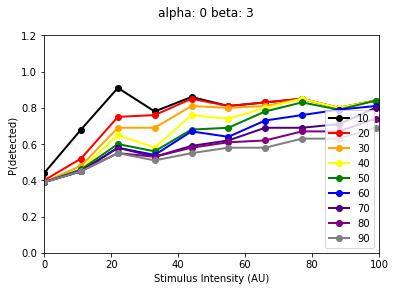

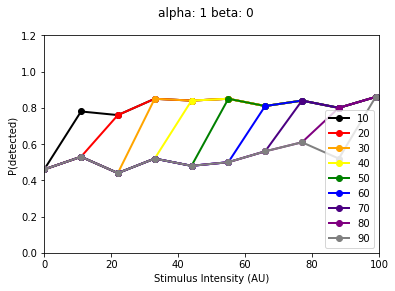

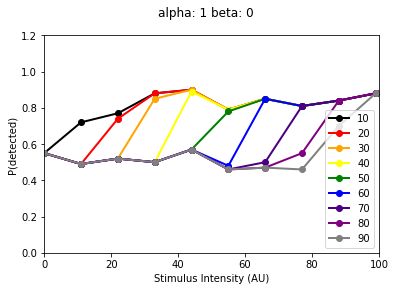

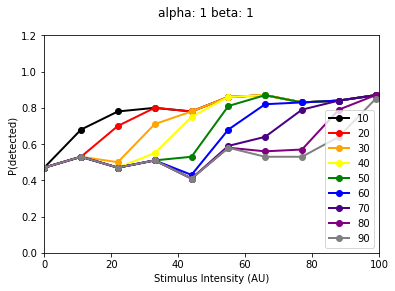

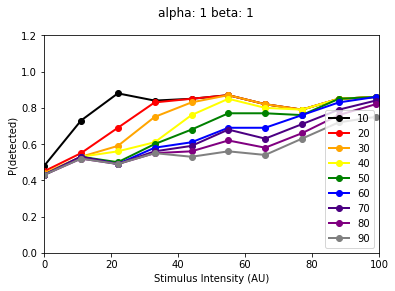

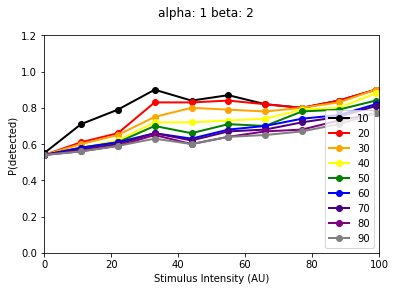

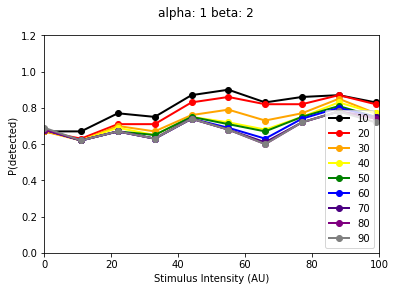

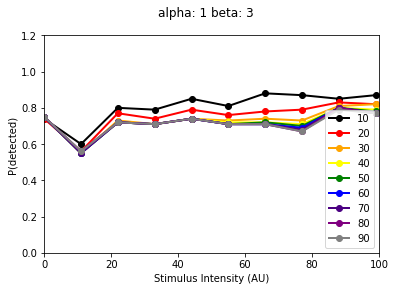

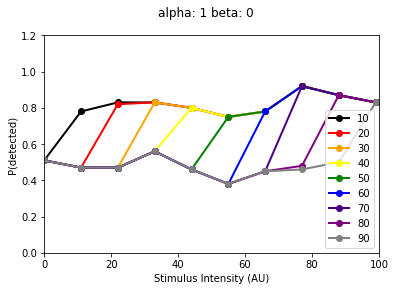

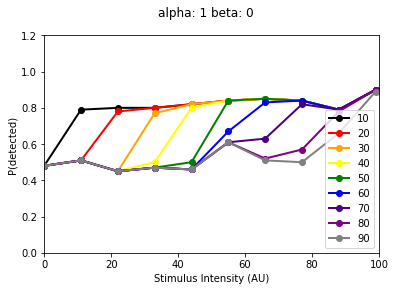

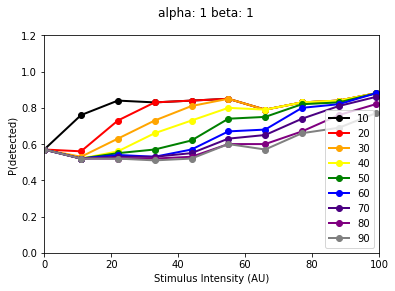

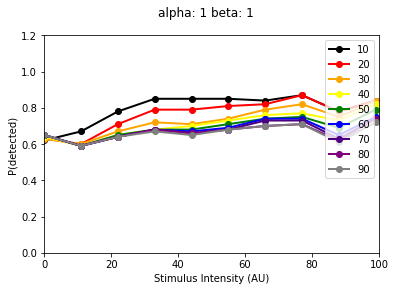

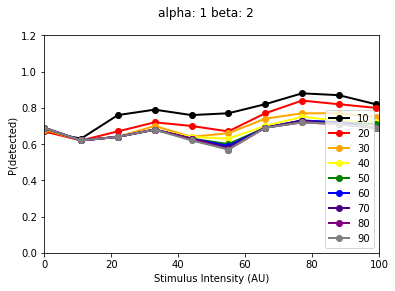

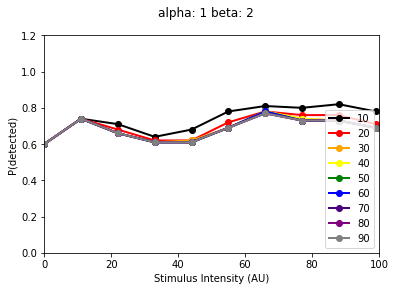

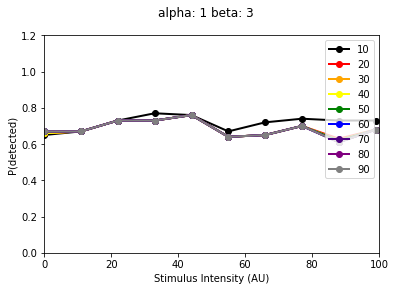

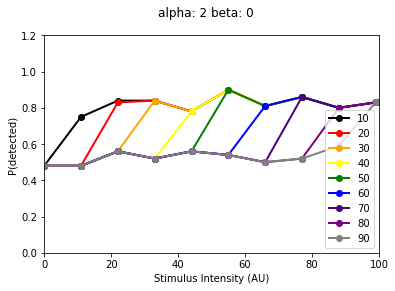

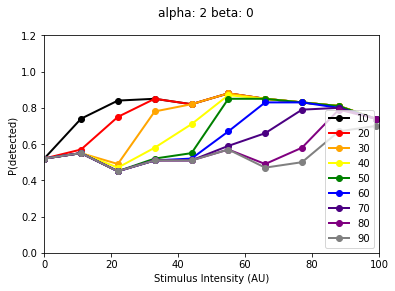

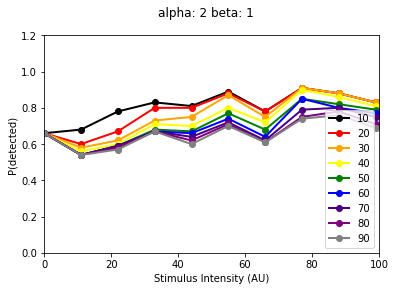

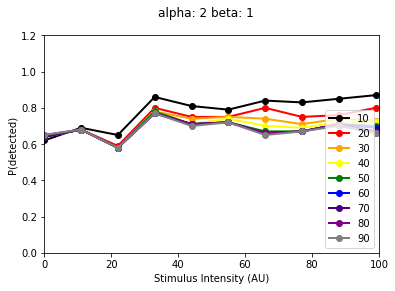

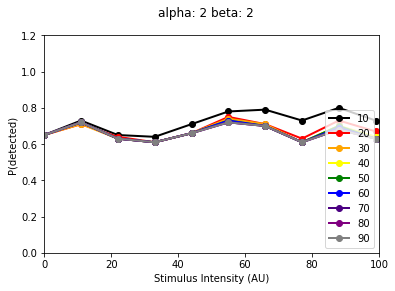

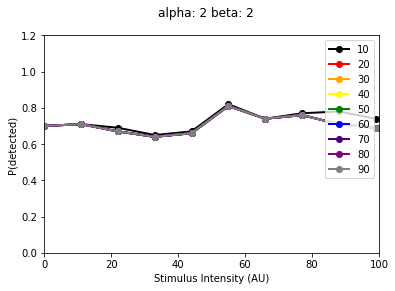

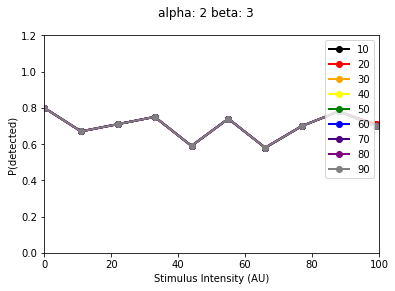

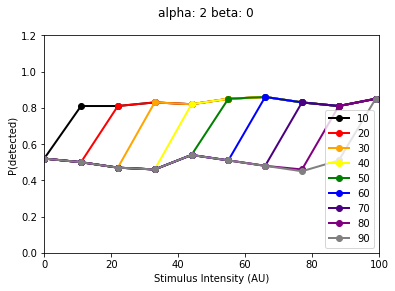

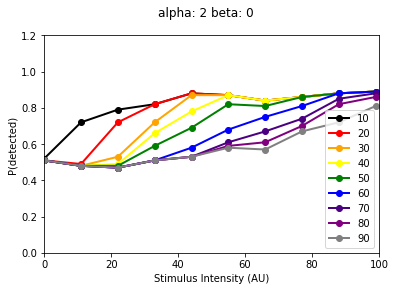

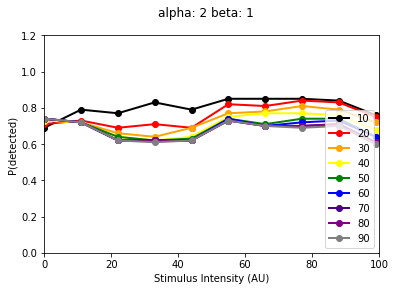

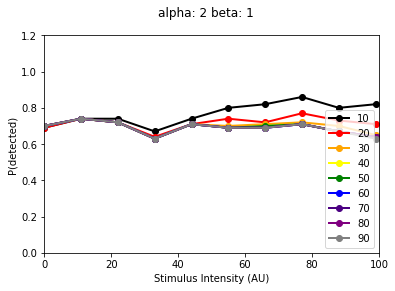

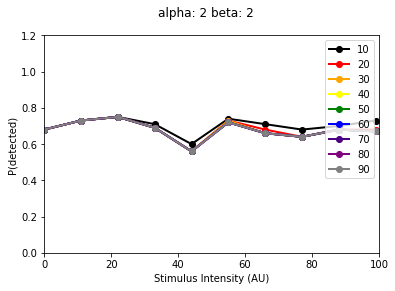

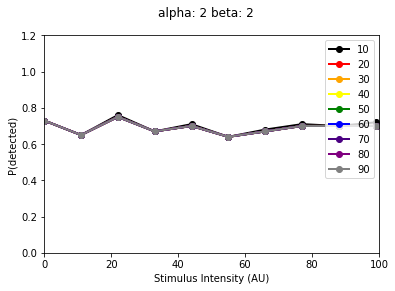

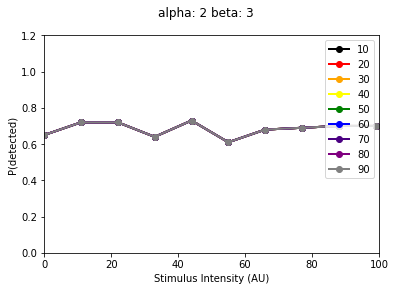

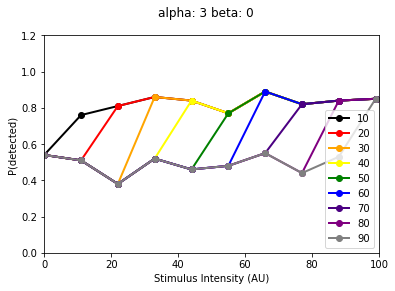

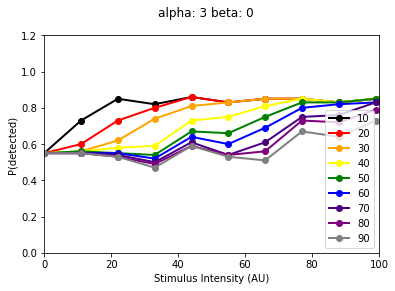

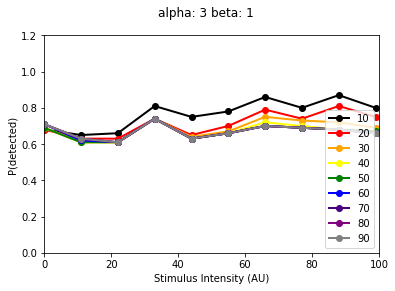

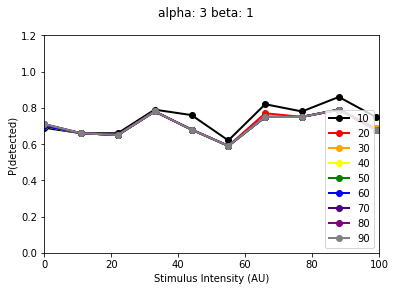

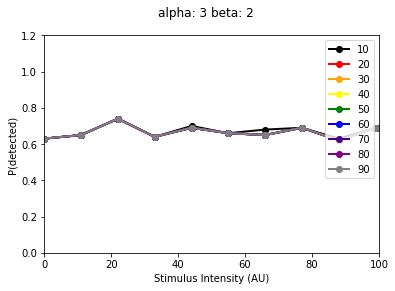

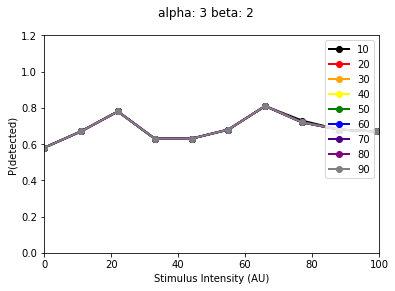

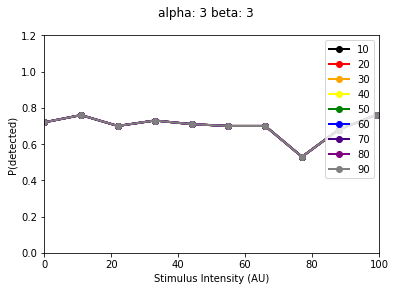

In [73]:
for i in range(len(alphas)):
    for j in range(len(betas)):
        zero_prob = np.random.normal(0, get_standard_deviation(0, alphas[i], betas[j]), 10000)
        pr_correct = []
        
        for k in range(len(mus)):
            non_zero_prob = get_gaussuan(stim_x, mus[k], get_standard_deviation(mus[k], alphas[i], betas[j]))
            
            detect_resp = detection(n_trial, stim_x, zero_prob, non_zero_prob)
#             print(detect_resp)
            cur_pr_correct = analysis(detect_resp)
            pr_correct.append(cur_pr_correct)


        plt.suptitle("alpha: %d beta: %d" %(alphas[i], betas[j]))
        plt.plot(nonzero_stim, pr_correct[0], color='black', marker='o', lw=2, label="10")
        plt.plot(nonzero_stim, pr_correct[1], color='red', marker='o', lw=2, label="20")
        plt.plot(nonzero_stim, pr_correct[2], color='orange', marker='o', lw=2, label="30")
        plt.plot(nonzero_stim, pr_correct[3], color='yellow', marker='o', lw=2, label="40")
        plt.plot(nonzero_stim, pr_correct[4], color='green', marker='o', lw=2, label="50")
        plt.plot(nonzero_stim, pr_correct[5], color='blue', marker='o', lw=2, label="60")
        plt.plot(nonzero_stim, pr_correct[6], color='indigo', marker='o', lw=2, label="70")
        plt.plot(nonzero_stim, pr_correct[7], color='purple', marker='o', lw=2, label="80")
        plt.plot(nonzero_stim, pr_correct[8], color='grey', marker='o', lw=2, label="90")
        plt.legend()
        plt.xlim(0, 100)
        plt.ylim(0, 1.2)
        plt.xlabel("Stimulus Intensity (AU)")
        plt.ylabel("P(detected)")
        plt.show()

## 2. Discrimination task

In [8]:
mus = np.arange(10, 91, 10)
alphas = np.arange(0, 3.5, 0.5)
betas = np.arange(0, 3.5, 0.5)

In [9]:
stimulus_intensity = np.linspace(10, 100, 10)

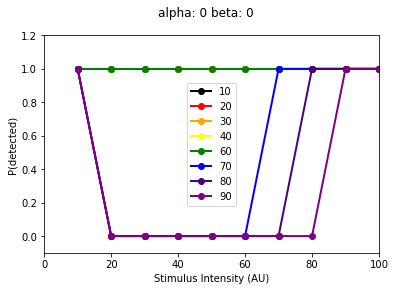

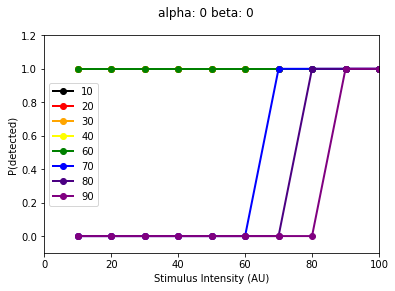

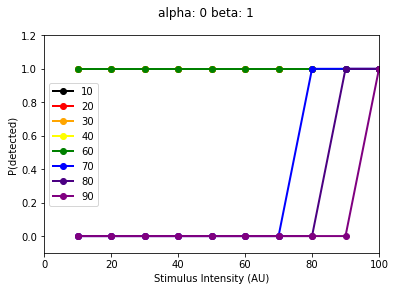

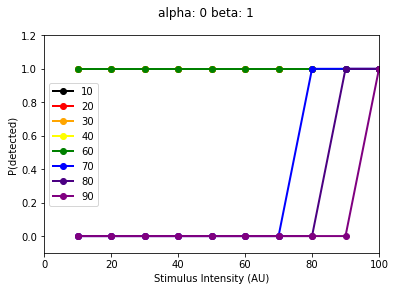

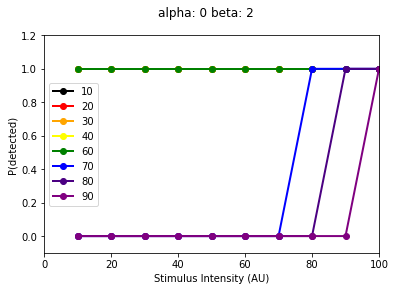

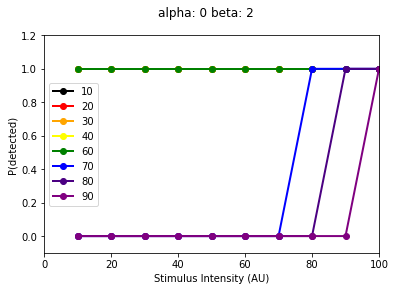

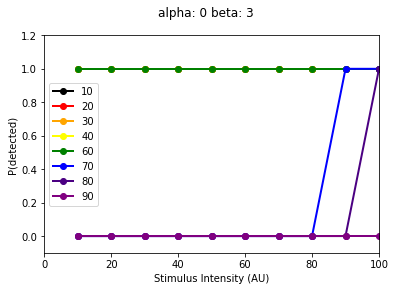

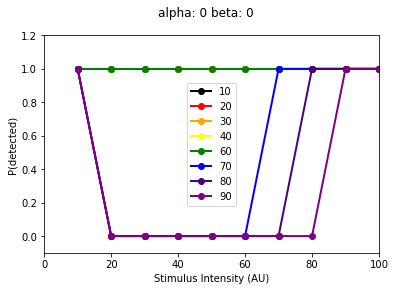

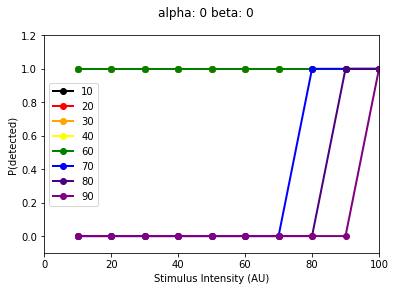

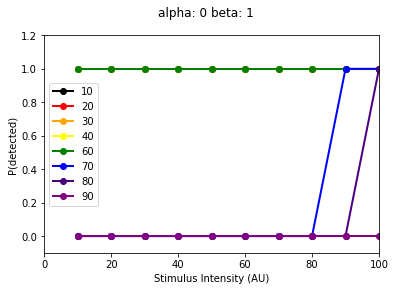

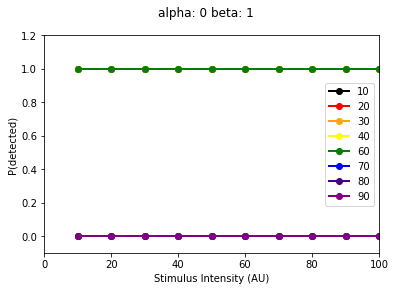

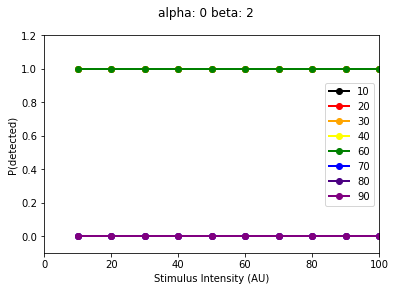

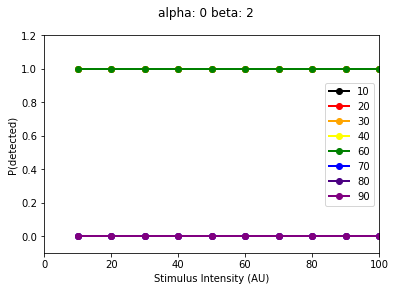

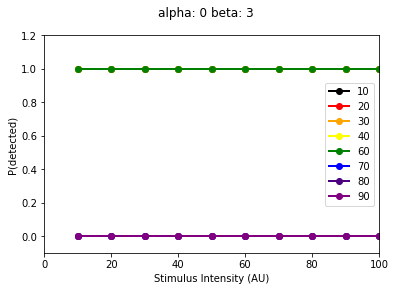

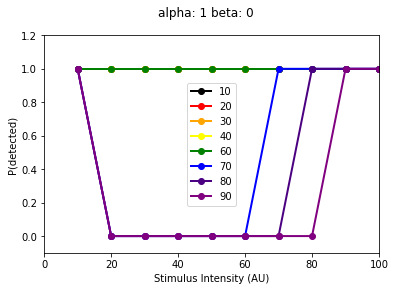

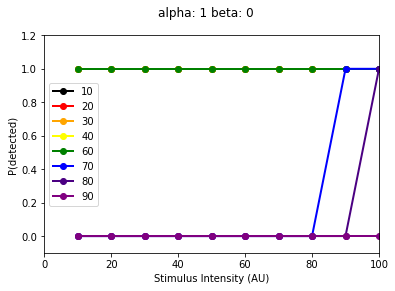

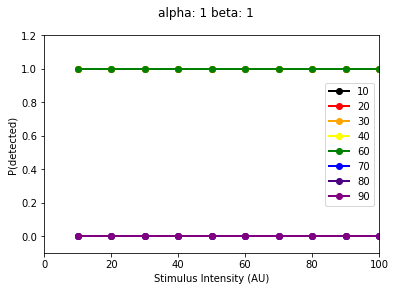

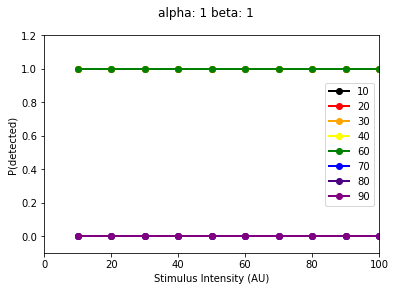

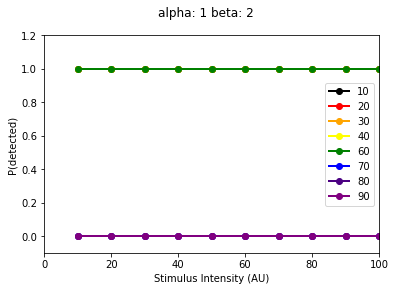

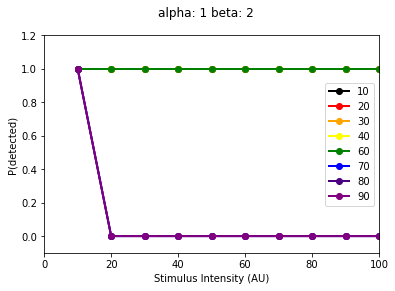

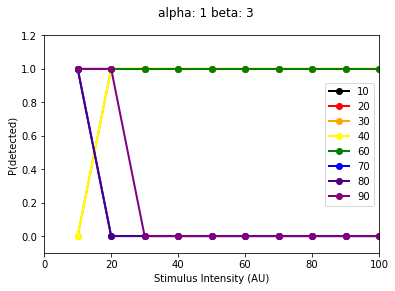

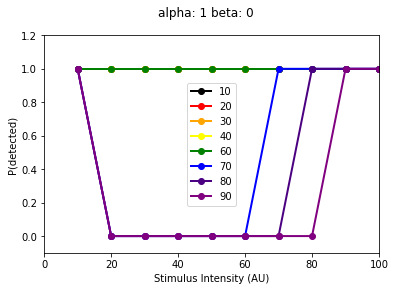

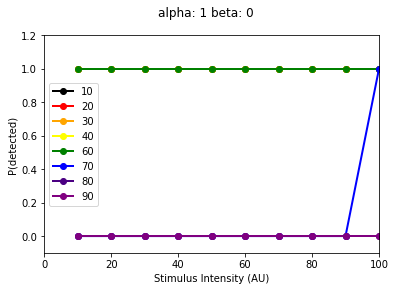

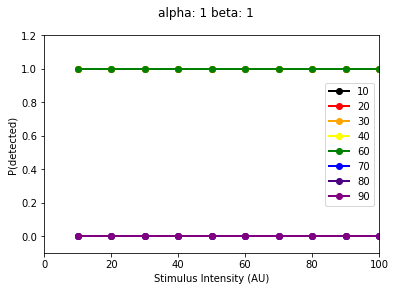

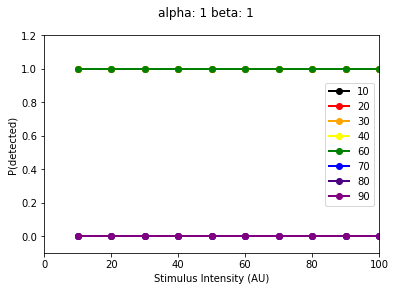

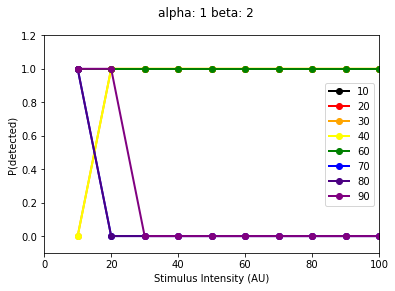

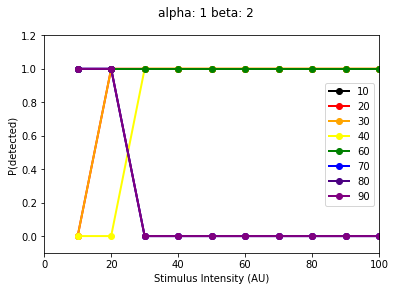

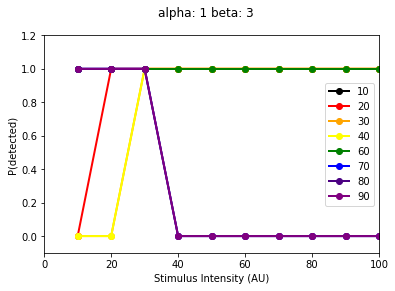

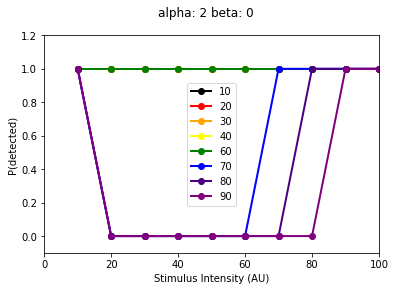

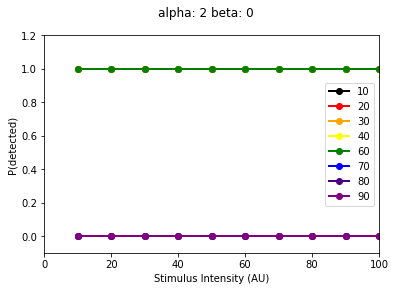

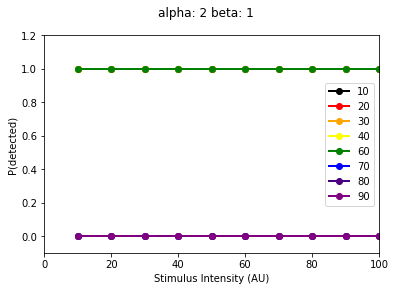

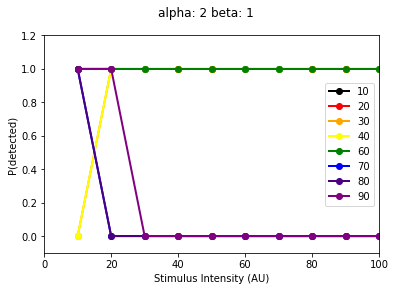

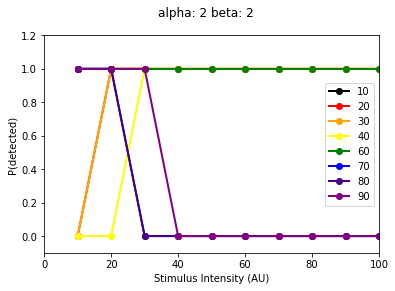

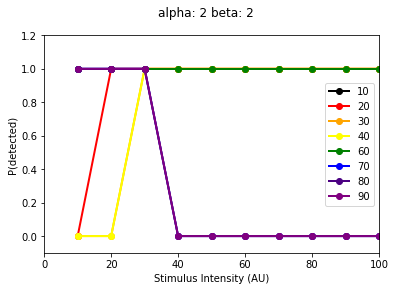

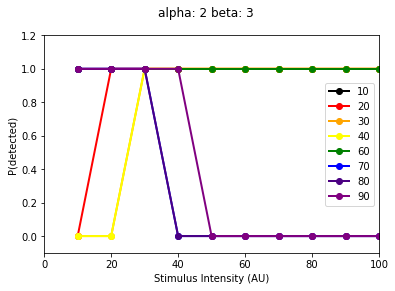

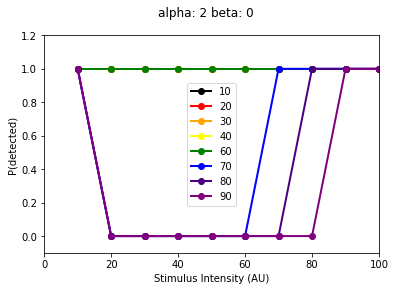

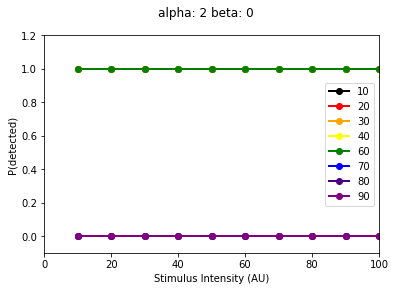

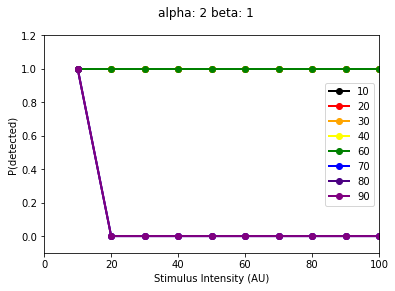

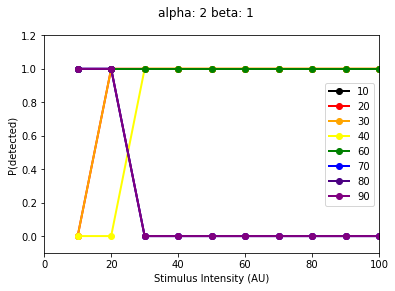

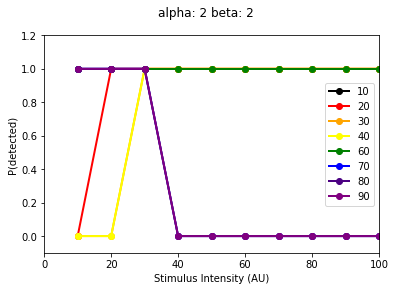

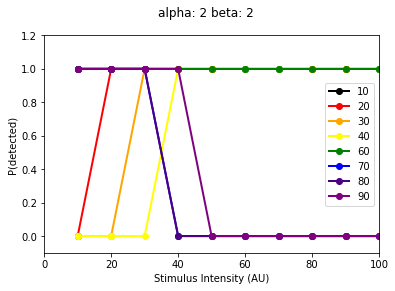

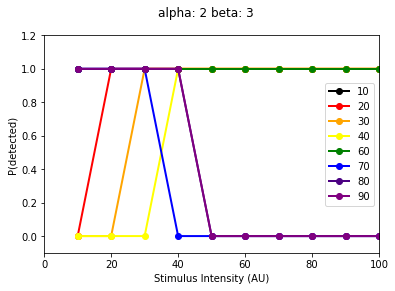

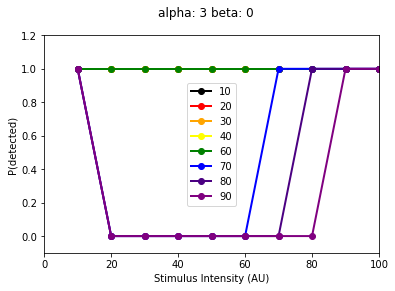

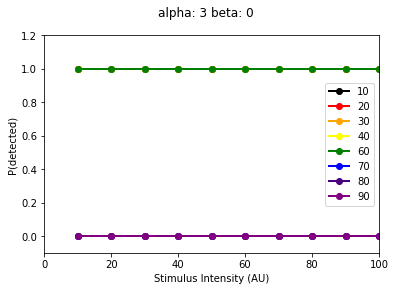

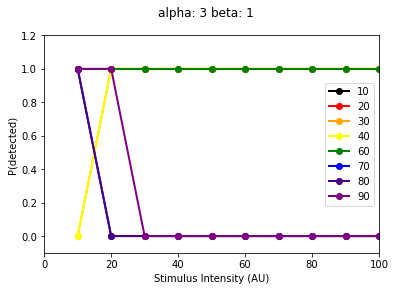

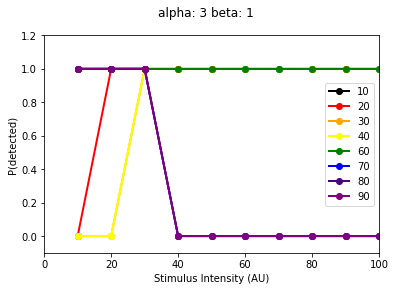

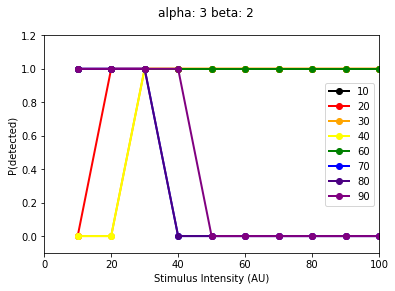

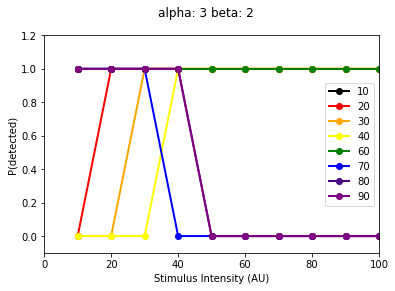

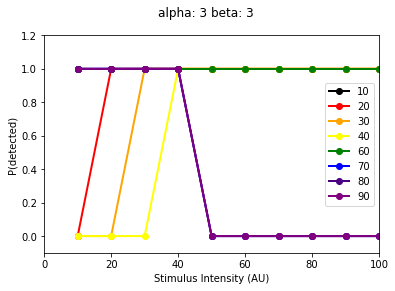

In [10]:
for i in range(len(alphas)):
    for j in range(len(betas)):
        s1 = generate_internal_response(stimulus_intensity, 50, alphas[i], betas[j])
        pr_correct = []
        
        for k in range(len(mus)):
            if mus[k] == 50:
                pass
            s2 = generate_internal_response(stimulus_intensity, mus[k], alphas[i], betas[j])
            
            detect_resp = detection(stimulus_intensity, s1, s2)
            cur_pr_correct = analysis(detect_resp)
            pr_correct.append(cur_pr_correct)
        
        plt.suptitle("alpha: %d beta: %d" %(alphas[i], betas[j]))
        plt.plot(stimulus_intensity, pr_correct[0], color='black', marker='o', lw=2, label="10")
        plt.plot(stimulus_intensity, pr_correct[1], color='red', marker='o', lw=2, label="20")
        plt.plot(stimulus_intensity, pr_correct[2], color='orange', marker='o', lw=2, label="30")
        plt.plot(stimulus_intensity, pr_correct[3], color='yellow', marker='o', lw=2, label="40")
        plt.plot(stimulus_intensity, pr_correct[4], color='green', marker='o', lw=2, label="60")
        plt.plot(stimulus_intensity, pr_correct[5], color='blue', marker='o', lw=2, label="70")
        plt.plot(stimulus_intensity, pr_correct[6], color='indigo', marker='o', lw=2, label="80")
        plt.plot(stimulus_intensity, pr_correct[7], color='purple', marker='o', lw=2, label="90")
        plt.legend()
        plt.xlim(0, 100)
        plt.ylim(-0.1, 1.2)
        plt.xlabel("Stimulus Intensity (AU)")
        plt.ylabel("P(detected)")
        plt.show()